# Data Exploration

In this notebook I will explore processed datasets named "merged.csv" and perform some descriprive analysis to be able to build a regression model that meets the assumptions". The notebook will also contain the Baseline Model that will be improved.

# File Content
* **Import Packages**
* **Upload Dataset**
* **Descriptive Analysis**
* **Preparation 1**


## Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm 
import matplotlib.pyplot as plt
%matplotlib inline

# Import additional files with statistical functions and LR assumptions check functions
import sys
import os

module_path = os.path.abspath(os.path.join('../../src'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import explore_data as ed 
import assumptions as asm

Import libraries that are necessary for regression model building

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

Adjust settings for the notebook view and set style preferences.

In [3]:
pd.options.display.max_rows = 500
pd.options.display.max_columns = 100

plt.style.use('seaborn-dark')
sns.set_theme('talk')
sns.set_palette(palette='husl')

## Upload Dataset

Upload "merged.csv" into df variable

In [4]:
df = pd.read_csv("../../data/processed/merged.csv", dtype={'PIN': str, 'Major': str, 'Minor': str})

ed.show_info(df)

Lenght of Dataset: 57703
                       missing_values_% Data_type  Duplicates
PIN                                 0.0    object           0
Major                               0.0    object           0
Minor                               0.0    object           0
PropType                            0.0    object           0
HBUAsIfVacant                       0.0   float64           0
HBUAsImproved                       0.0   float64           0
SqFtLot                             0.0   float64           0
WaterSystem                         0.0   float64           0
SewerSystem                         0.0   float64           0
Access                              0.0   float64           0
Topography                          0.0   float64           0
StreetSurface                       0.0   float64           0
RestrictiveSzShape                  0.0   float64           0
WfntLocation                        0.0   float64           0
WfntFootage                         0.0   flo

Move the target variable, which is "SalePrice" to the first column.

In [5]:
letters_index = (df.columns).get_loc("SalePrice")
print(letters_index)

20


In [6]:
cols = list(df.columns)
cols = [cols[20]] + cols[:20] + cols[21:]
df = df[cols]
df.head()

,SalePrice,PIN,Major,Minor,PropType,HBUAsIfVacant,HBUAsImproved,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,WfntLocation,WfntFootage,LotDepthFactor,NbrBldgSites,CurrentUseDesignation,ExciseTaxNbr,DocumentDate,SaleInstrument,SaleReason,BldgGrade,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,847888.0,8078410410,807841,0410,R,1.0,1.0,7424.0,2.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3005895,2019-08-16,3,1,8.0,1360.0,0.0,840.0,0.0,0.0,0.0,2200.0,0.0,0.0,0.0,0.0,460.0,0.0,0.0,0.0,5.0,2.0,0.0,4.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1987.0,0.0,0.0,0.0,3.0,0.0
1,819000.0,7550800015,755080,0015,R,1.0,1.0,5000.0,2.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3015395,2019-10-12,3,1,7.0,810.0,0.0,0.0,0.0,0.0,0.0,1800.0,990.0,990.0,7.0,0.0,0.0,180.0,0.0,120.0,5.0,2.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1923.0,0.0,0.0,0.0,4.0,0.0
2,875000.0,8824900210,882490,0210,R,1.0,1.0,3600.0,2.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2958914,2018-10-17,3,1,8.0,1300.0,590.0,0.0,0.0,0.0,0.0,1890.0,750.0,0.0,0.0,220.0,0.0,190.0,0.0,0.0,5.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1919.0,0.0,0.0,0.0,3.0,0.0
3,780000.0,2617300290,261730,0290,R,1.0,1.0,36154.0,1.0,1.0,3.0,1.0,1.0,0.0,8.0,1.0,0.0,0.0,0.0,3044759,2020-04-21,2,1,8.0,1440.0,910.0,0.0,0.0,0.0,0.0,2660.0,310.0,310.0,7.0,0.0,530.0,170.0,0.0,100.0,5.0,3.0,0.0,3.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1985.0,0.0,0.0,0.0,4.0,0.0
4,505000.0,4250000030,425000,0030,R,1.0,1.0,10200.0,2.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2918289,2018-03-01,3,1,7.0,1660.0,0.0,0.0,0.0,0.0,0.0,1660.0,0.0,0.0,0.0,0.0,340.0,0.0,0.0,350.0,7.0,3.0,0.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1962.0,0.0,0.0,0.0,4.0,0.0


Convert Document Date column to datetime type and create new column storing only year of sale.

In [7]:
df['DocumentDate'] = pd.to_datetime(df['DocumentDate'])
df['YearSold'] = pd.DatetimeIndex(df['DocumentDate']).year

# Descriptive Analysis

First, I will perform descriptive analysis to get the mean, standart deviation and value counts of the columns

In [8]:
df.describe()

,SalePrice,HBUAsIfVacant,HBUAsImproved,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,WfntLocation,WfntFootage,LotDepthFactor,NbrBldgSites,CurrentUseDesignation,ExciseTaxNbr,SaleInstrument,SaleReason,BldgGrade,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Obsolescence,PcntNetCondition,Condition,AddnlCost,YearSold
count,5.770300e+04,57703.000000,57703.000000,5.770300e+04,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,5.770300e+04,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000,57703.000000
mean,7.488904e+05,1.037312,1.004142,1.699210e+04,1.970799,1.842625,3.936121,0.086963,1.019202,0.003917,0.118330,1.557146,0.054919,0.006828,0.004142,2.930273e+06,3.097447,1.031194,7.662877,1326.668371,48.336828,490.787723,4.462541,0.693101,0.622342,2186.929744,492.610124,318.043793,2.765853,80.148935,284.369738,73.918791,5.391505,140.550769,4.955184,2.076842,3.788521,3.482713,0.468503,0.508535,1.579381,0.641544,0.326933,0.073792,0.195622,1971.429978,104.823562,0.105246,0.006187,3.539625,740.539279,2017.881358
std,5.746134e+05,0.463956,0.083676,5.109939e+04,0.170316,0.365392,0.263176,0.281783,0.184807,0.062461,0.917029,16.682940,2.285098,0.213464,0.108398,7.538775e+04,1.943016,0.671233,1.192947,470.219507,170.318005,675.688545,59.386150,20.729585,17.843244,969.428579,599.040897,472.189797,3.534584,184.316867,292.286508,132.014716,37.301850,621.968412,0.929829,0.561729,17.358609,0.899999,0.530294,0.653914,0.697919,0.635011,0.507157,0.272152,0.415669,29.277796,445.758322,2.084752,0.452346,0.721015,2669.654819,1.279125
min,-2.000000e+02,0.000000,0.000000,6.070000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.710249e+06,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2015.000000
25%,4.250000e+05,1.000000,1.000000,5.838500e+03,2.000000,2.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.857876e+06,3.000000,1.000000,7.000000,1010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1952.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2017.000000
50%,6.180000e+05,1.000000,1.000000,8.010000e+03,2.000000,2.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.941493e+06,3.000000,1.000000,7.000000,1250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2030.000000,0.000000,0.000000,0.000000,0.000000,260.000000,30.000000,0.000000,0.000000,5.000000,2.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1974.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2018.000000
75%,8.750000e+05,1.000000,1.000000,1.127050e+04,2.000000,2.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.

- The statistics show that average price for houses is $514 781. 
- The standart deviation of the target variable (Sale Price) is \$836 779. 

### Remove Outliers

I will use statistic function from explore_data file to remove outliers from columns that might have them.

In [9]:
cols = ['SqFtOpenPorch', 'SqFtDeck', 'SqFtGarageAttached', 
        'SqFtTotBasement', 'SqFtTotLiving']

for column in df[cols]:
    df = ed.remove_outliers(df, column)
df.describe()

,SalePrice,HBUAsIfVacant,HBUAsImproved,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,WfntLocation,WfntFootage,LotDepthFactor,NbrBldgSites,CurrentUseDesignation,ExciseTaxNbr,SaleInstrument,SaleReason,BldgGrade,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Obsolescence,PcntNetCondition,Condition,AddnlCost,YearSold
count,4.947100e+04,49471.000000,49471.000000,4.947100e+04,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,4.947100e+04,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000,49471.000000
mean,6.635479e+05,1.039518,1.004265,1.365143e+04,1.978270,1.862061,3.948677,0.071254,1.015261,0.003073,0.075519,0.900204,0.037477,0.006893,0.002021,2.930053e+06,3.097512,1.033029,7.472155,1252.475511,48.063269,413.461765,3.003901,0.582119,0.611166,2000.503467,458.933880,284.755372,2.596329,77.181035,259.197853,46.137596,5.286532,100.089588,4.912636,2.068303,3.974066,3.405874,0.433668,0.468921,1.506802,0.604293,0.309717,0.071476,0.184411,1969.219320,96.355926,0.099048,0.005235,3.553617,601.553233,2017.877605
std,3.810013e+05,0.477082,0.082671,4.128649e+04,0.146769,0.345718,0.236830,0.257251,0.164918,0.055346,0.742020,12.064449,1.743094,0.224741,0.074123,7.533782e+04,1.932014,0.690869,1.027728,377.153620,164.396679,601.770293,47.682639,19.520539,17.622517,750.833064,552.946247,420.871140,3.383137,173.091391,265.625641,62.676623,33.936930,141.854557,0.923170,0.567288,17.890494,0.866970,0.511680,0.616070,0.634202,0.581669,0.485207,0.266264,0.397908,29.004756,428.345886,2.084697,0.407967,0.726683,2018.216362,1.278374
min,-2.000000e+02,0.000000,0.000000,6.070000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.710249e+06,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2015.000000
25%,4.100000e+05,1.000000,1.000000,5.570000e+03,2.000000,2.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.857782e+06,3.000000,1.000000,7.000000,990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1430.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2017.000000
50%,5.800000e+05,1.000000,1.000000,7.690000e+03,2.000000,2.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.940956e+06,3.000000,1.000000,7.000000,1200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,0.000000,0.000000,5.000000,2.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1969.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2018.000000
75%,8.100000e+05,1.000000,1.000000,1.027000e+04,2.000000,2.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.0000

For the target variable 'Sale Price' I will remove outiers manually by checking the value counts

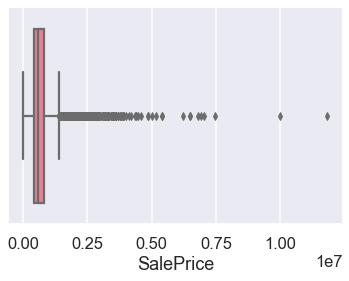

In [10]:
sns.boxplot(x=df['SalePrice'])

The target variable has outliers starting from 1500000, I will keep data that is less than this value.

In [11]:
df = df[df['SalePrice'] < 1500000 ]
ed.show_info(df)

Lenght of Dataset: 47898
                       missing_values_%       Data_type  Duplicates
SalePrice                           0.0         float64           0
PIN                                 0.0          object           0
Major                               0.0          object           0
Minor                               0.0          object           0
PropType                            0.0          object           0
HBUAsIfVacant                       0.0         float64           0
HBUAsImproved                       0.0         float64           0
SqFtLot                             0.0         float64           0
WaterSystem                         0.0         float64           0
SewerSystem                         0.0         float64           0
Access                              0.0         float64           0
Topography                          0.0         float64           0
StreetSurface                       0.0         float64           0
RestrictiveSzShape     

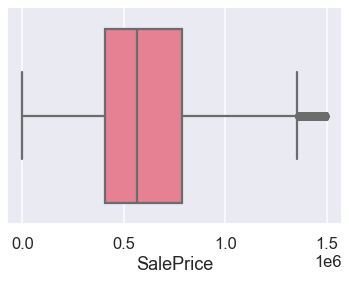

In [12]:
sns.boxplot(x=df['SalePrice'])

**Removing Outliers Result:** The number of observations went down to 42661 and the SalePrice still have some outliers, but I will keep them.

### Plot histograms for the continious variables in dataset

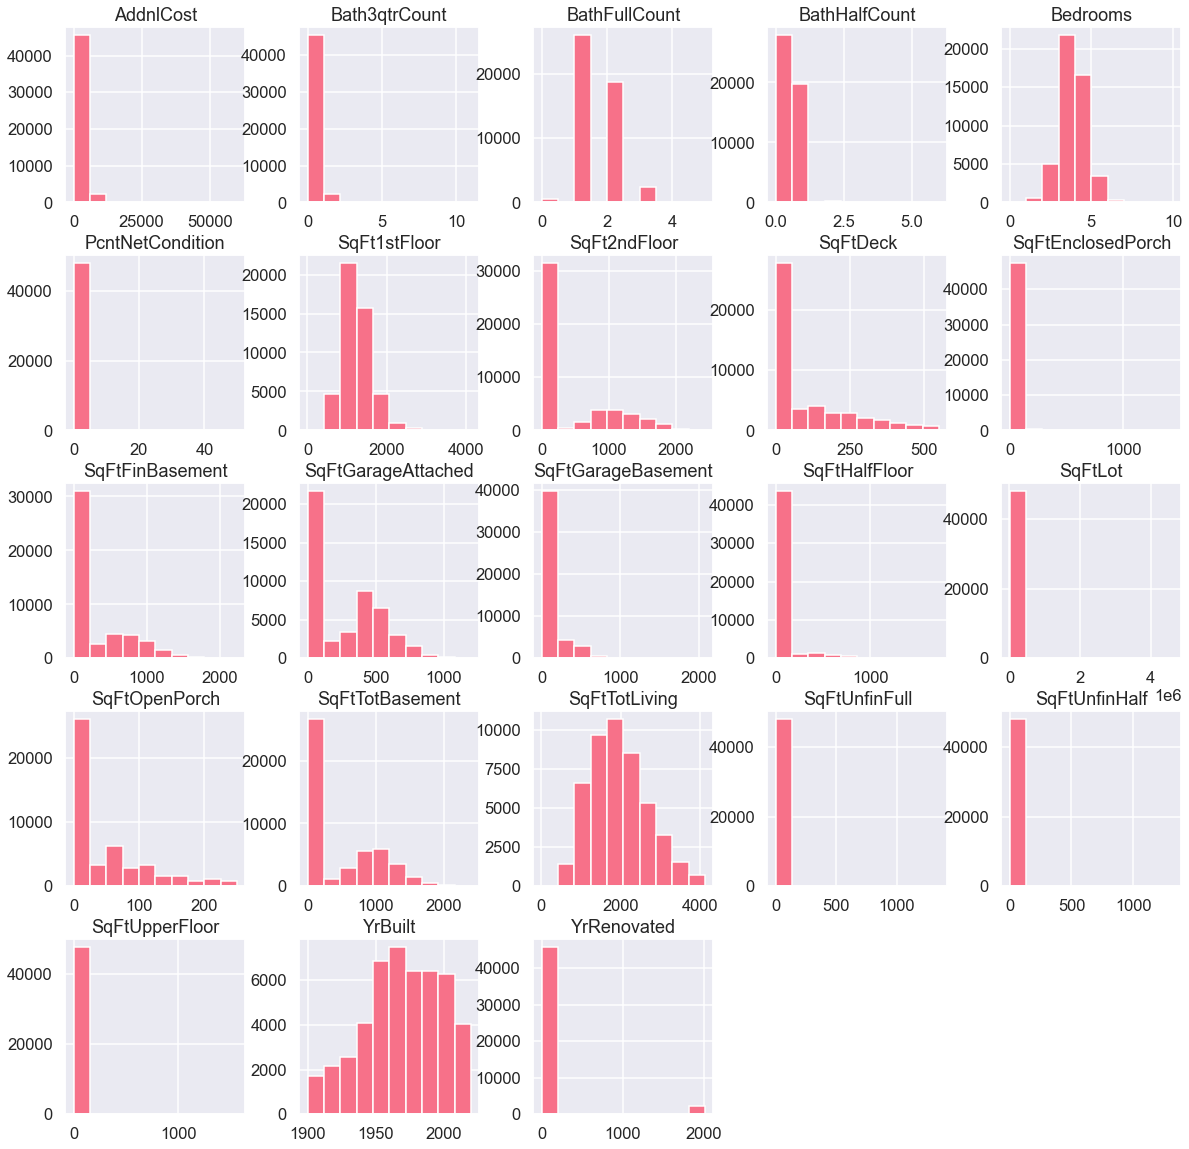

In [13]:
cols_cont =['SqFtOpenPorch', 'SqFtDeck', 'SqFtGarageAttached', 
            'SqFtTotBasement', 'SqFtTotLiving', 'SqFtLot', 
            'SqFt1stFloor', 'AddnlCost', 'PcntNetCondition', 
            'SqFtHalfFloor', 'SqFt2ndFloor', 'SqFtUpperFloor', 
            'SqFtUnfinFull', 'SqFtUnfinHalf', 'SqFtFinBasement', 
            'SqFtGarageBasement', 'SqFtEnclosedPorch','Bedrooms',
            'BathHalfCount', 'Bath3qtrCount','BathFullCount',
            'YrBuilt','YrRenovated']

df[cols_cont].hist(figsize = (20,20));

**Histogram Results** The histograms show that most of the variables are not normally distributed and are positively skewed. The columns SqFt1stFloor, Bedrooms, YrBuilt and SqFtTotLiving are the closest ones to normal distributon.

### Normalize Data

I will normalize the data in the columns that are continious.

Plot the histogram again to see the results.


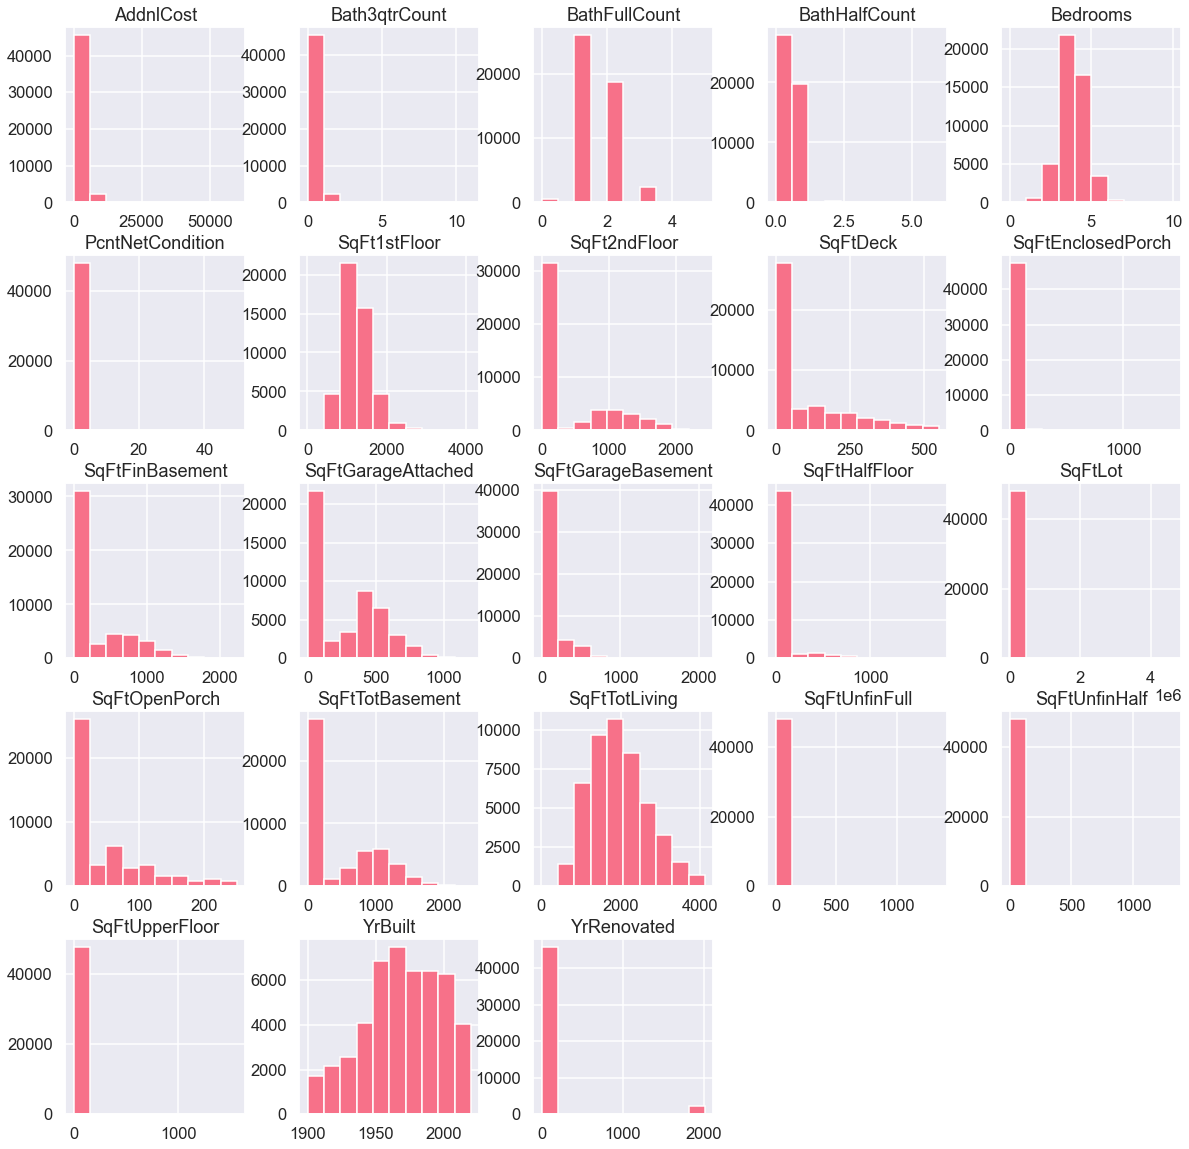

In [14]:
df[cols_cont].hist(figsize = (20,20));

# Preparation 1

## Build Heatmap

I will build Heatmap in order to see how the provided data correlates with target variable.

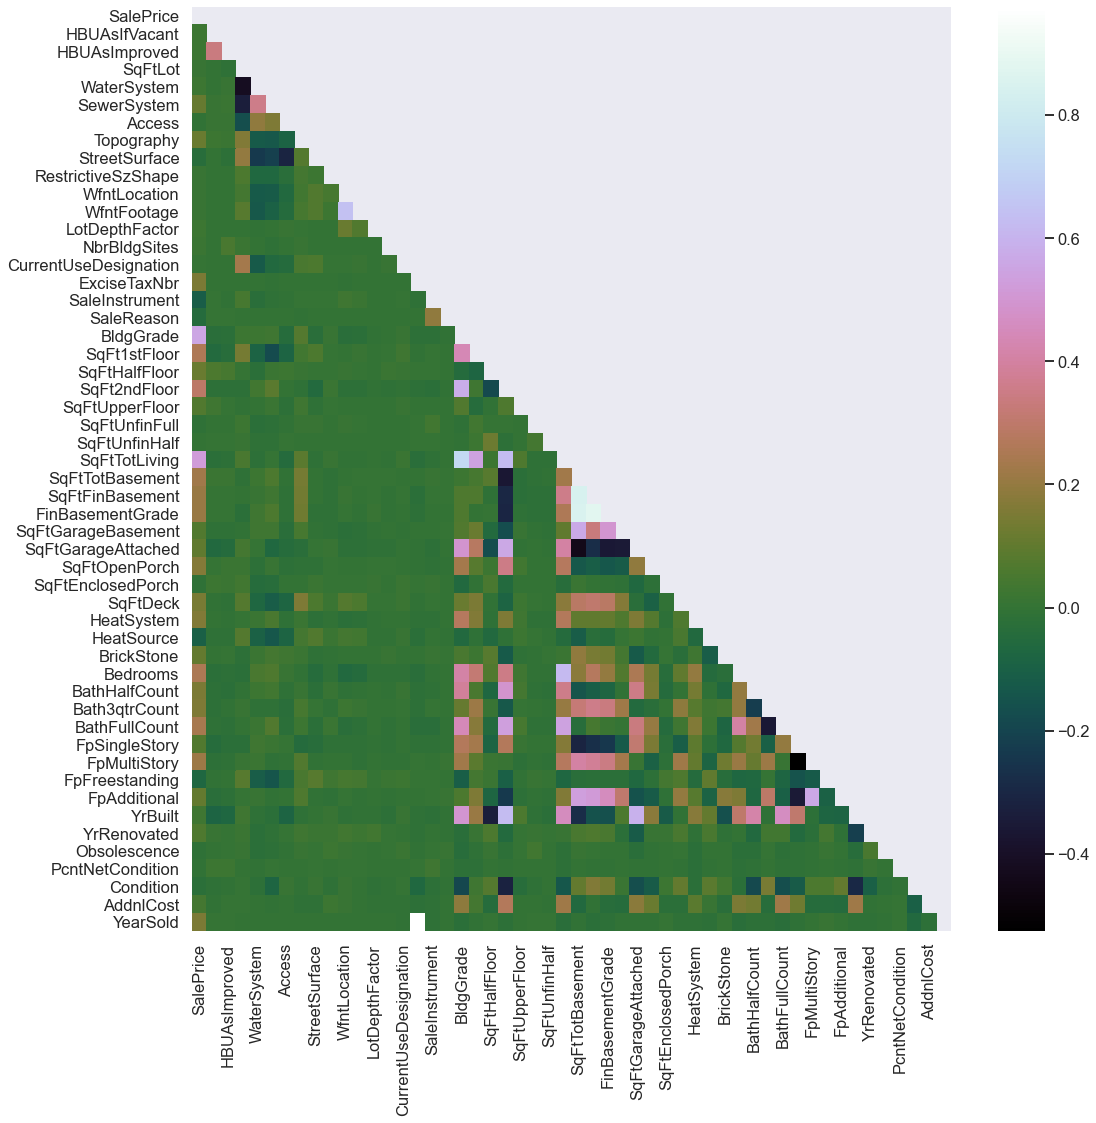

In [15]:
corr = df.corr(method = 'pearson')

mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(17,17))
sns.heatmap(corr, mask = mask, ax = ax1, cmap="cubehelix");

Calculate the correlation coefficients for all variables to finf most correlated features

In [16]:
corr_matrix = df.corr()
corr_mat = corr_matrix["SalePrice"].sort_values(ascending=False)
print(corr_mat)

SalePrice                1.000000
BldgGrade                0.555576
SqFtTotLiving            0.521252
SqFt2ndFloor             0.293170
SqFt1stFloor             0.258071
Bedrooms                 0.249622
BathFullCount            0.241440
SqFtTotBasement          0.228157
FpMultiStory             0.216034
FinBasementGrade         0.210941
SqFtFinBasement          0.209977
SqFtOpenPorch            0.168499
HeatSystem               0.163140
Bath3qtrCount            0.156965
ExciseTaxNbr             0.152464
YearSold                 0.151408
BathHalfCount            0.150256
SqFtDeck                 0.145612
SqFtHalfFloor            0.119083
Topography               0.116552
SewerSystem              0.110101
BrickStone               0.106054
FpAdditional             0.105083
SqFtGarageAttached       0.097906
FpSingleStory            0.072078
SqFtGarageBasement       0.072030
SqFtUpperFloor           0.070964
YrRenovated              0.065818
AddnlCost                0.039155
YrBuilt       

Table shows that most correlated features are 'SalePrice', 'SqFtTotLiving', 'SqFt1stFloor', 'SqFt2ndFloor' and 'BathFullCount'. 

Build a pairplot for the features above.

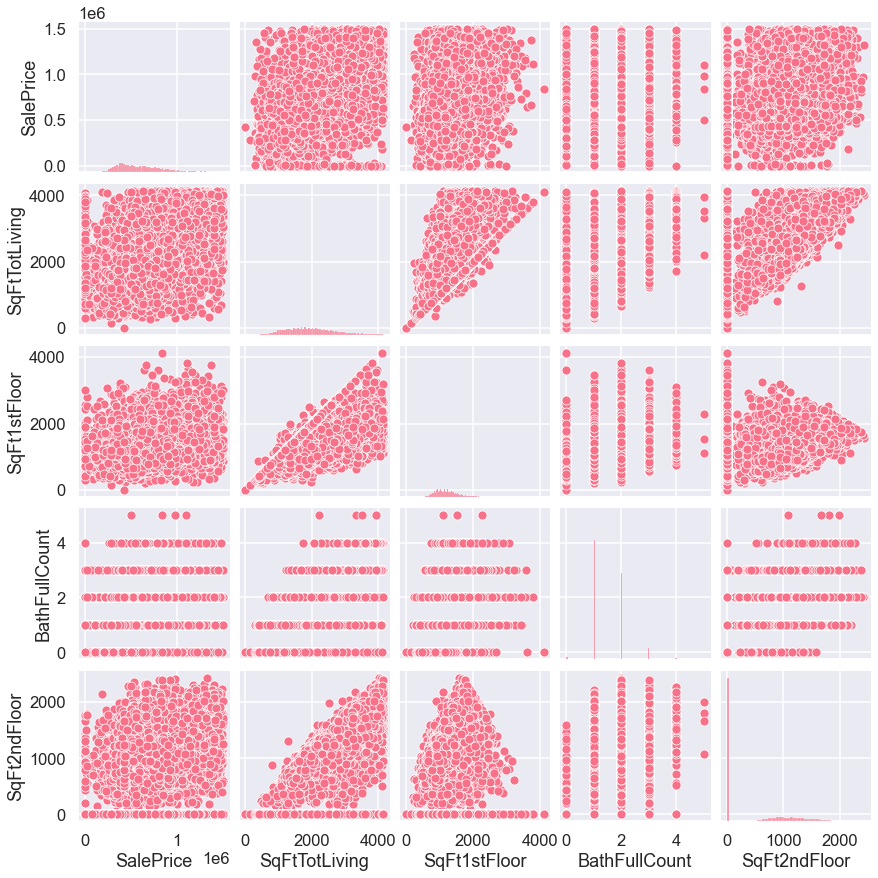

In [17]:
positively_correlated_cols = ['SalePrice', 'SqFtTotLiving','SqFt1stFloor', 
                              'BathFullCount', 'SqFt2ndFloor']
positively_correlated_df = df[positively_correlated_cols]
sns.pairplot(positively_correlated_df);

Based on the pairplot I can't tell if there is a linear relationship between target variable and predictors.

# Baseline Model

Based on the correlatio coefficients, I will build first regression model with target variable 'SalePrice' and 'SqFtTotLiving' as predictor.

In [18]:
fsm_df = df[["SalePrice", "SqFtTotLiving"]].copy()
fsm = ols(formula="SalePrice ~SqFtTotLiving" , data=fsm_df)
fsm_results = fsm.fit()
fsm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                 1.787e+04
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:40:19   Log-Likelihood:            -6.6061e+05
No. Observations:               47898   AIC:                         1.321e+06
Df Residuals:                   47896   BIC:                         1.321e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.288e+05   3124.029     73.245      0.000    2.23e+05    2.35e+05
SqFtTotLiving   199.5758      1.493    133.673      0.000     196.650     202.502
==============================================================================
Omnibus:                     2548.870   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3003.117
Skew:                           0.579   Prob(JB):                         0.00
Kurtosis:                       3.405   Cond. No.                     6.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Baseline Model Results:

The summary of model shows that about **27% of the SalePrice is explaiened by SqFtTotLiving** variable. For **every square foot increase** in SqFtTotLiving, **SalePrice will increase by \$199.58.**

## Check Assupmtions for Model 1

### Checking Linearity

**Rainbow Test**

In [19]:
asm.linear(fsm_results)

Rainbow statistic: 0.9960694679202636
Rainbow p-value: 0.6197117654689135


**Linearity Results:** The Rainbow statistics show that **p- value is greater than 0.05**, thus, the **model passes linearity check.**

### Checking Normality of Residuals

**QQ Plot**

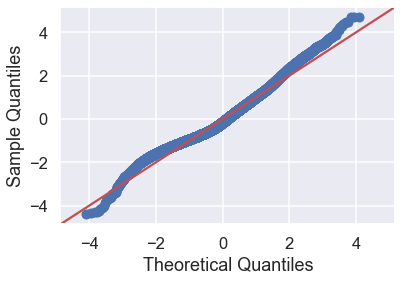

In [20]:
asm.normal(fsm_results)

**Normality Results:** The graph shows that residuals are not perfectly overlaying the diagonal, thus **residuals are not normally distributed**. In addition, the **Jarque-Bera Test's p-value is less than 0.05**, which also rejects the normal distribution of residuals.

### Checking Homoscadasticity

Graph a scatter plot for the errors (actual sale price - predicted sale price) against the predicted sale price.

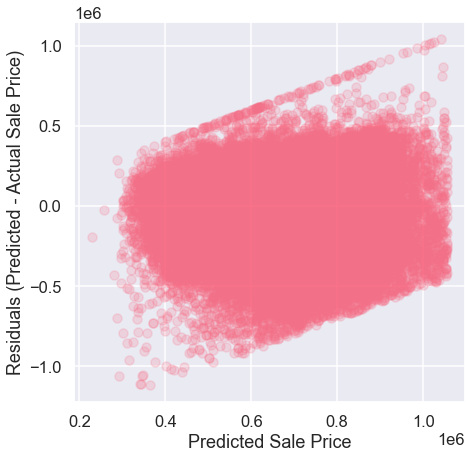

In [21]:
asm.homoscad(fsm_results, fsm_df)

**Homoscadasticity Results:** The Errors Plot has an **upward trend** and clearly, **violates the homoscadasticity assumption.**

* The reason for upward trend of the Error Plot might be the year distribution of the observations. In order to narrow down them I will keep only the sales from the recent year.

### Drop sales with irrelevant year

In [22]:
df.YearSold.value_counts()

2019    12893
2017    11552
2018     9792
2016     8722
2020     4903
2015       36
Name: YearSold, dtype: int64

For the project purposes I will keep in dataset sales only from 2019

In [23]:
df = df[df['YearSold'] == 2019 ]
ed.show_info(df)

Lenght of Dataset: 12893
                       missing_values_%       Data_type  Duplicates
SalePrice                           0.0         float64           0
PIN                                 0.0          object           0
Major                               0.0          object           0
Minor                               0.0          object           0
PropType                            0.0          object           0
HBUAsIfVacant                       0.0         float64           0
HBUAsImproved                       0.0         float64           0
SqFtLot                             0.0         float64           0
WaterSystem                         0.0         float64           0
SewerSystem                         0.0         float64           0
Access                              0.0         float64           0
Topography                          0.0         float64           0
StreetSurface                       0.0         float64           0
RestrictiveSzShape     

Drop DocumentDate Column

In [24]:
df.drop(columns = ['DocumentDate'], inplace = True)
df.head()

,SalePrice,PIN,Major,Minor,PropType,HBUAsIfVacant,HBUAsImproved,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,WfntLocation,WfntFootage,LotDepthFactor,NbrBldgSites,CurrentUseDesignation,ExciseTaxNbr,SaleInstrument,SaleReason,BldgGrade,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Obsolescence,PcntNetCondition,Condition,AddnlCost,YearSold
0,847888.0,8078410410,807841,0410,R,1.0,1.0,7424.0,2.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3005895,3,1,8.0,1360.0,0.0,840.0,0.0,0.0,0.0,2200.0,0.0,0.0,0.0,0.0,460.0,0.0,0.0,0.0,5.0,2.0,0.0,4.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1987.0,0.0,0.0,0.0,3.0,0.0,2019
1,819000.0,7550800015,755080,0015,R,1.0,1.0,5000.0,2.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3015395,3,1,7.0,810.0,0.0,0.0,0.0,0.0,0.0,1800.0,990.0,990.0,7.0,0.0,0.0,180.0,0.0,120.0,5.0,2.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1923.0,0.0,0.0,0.0,4.0,0.0,2019
6,612000.0,5137630080,513763,0080,R,1.0,1.0,5239.0,2.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2976399,3,1,8.0,1157.0,0.0,1641.0,0.0,0.0,0.0,2798.0,0.0,0.0,0.0,0.0,490.0,214.0,0.0,0.0,5.0,2.0,0.0,4.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,2018.0,0.0,0.0,0.0,3.0,0.0,2019
14,700000.0,7302000190,730200,0190,R,1.0,1.0,47862.0,2.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2976418,3,1,8.0,1480.0,0.0,0.0,0.0,0.0,0.0,2770.0,1410.0,1290.0,7.0,0.0,500.0,40.0,0.0,500.0,5.0,3.0,0.0,5.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,1978.0,0.0,0.0,0.0,3.0,0.0,2019
21,733000.0,4174600277,417460,0277,R,1.0,1.0,8400.0,2.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2986450,3,1,6.0,1000.0,0.0,0.0,0.0,0.0,0.0,1800.0,1000.0,800.0,6.0,0.0,0.0,160.0,0.0,0.0,5.0,1.0,0.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1949.0,0.0,0.0,0.0,3.0,0.0,2019


# Baseline Model 2

After removing the irrelevant sales, I will try to build a model with SqFtTotLiving predictor, to see if the results have improved.

In [25]:
fsm_df = df[["SalePrice", "SqFtTotLiving"]].copy()
fsm = ols(formula="SalePrice ~SqFtTotLiving" , data=fsm_df)
fsm_results = fsm.fit()
fsm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     5029.
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:40:19   Log-Likelihood:            -1.7760e+05
No. Observations:               12893   AIC:                         3.552e+05
Df Residuals:                   12891   BIC:                         3.552e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       2.61e+05   5994.782     43.532      0.000    2.49e+05    2.73e+05
SqFtTotLiving   202.7456      2.859     70.916      0.000     197.142     208.350
==============================================================================
Omnibus:                      688.548   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              806.009
Skew:                           0.586   Prob(JB):                    9.49e-176
Kurtosis:                       3.354   Cond. No.                     6.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Baseline Model 2 Results:

The **percent of the SalePrice** explained by SqFtTotLiving has increased to **28**. And for **every square foot increase** in SqFtTotLiving, **SalePrice** will now **increase by $202.75.**

## Check Assumptions for Model 2

### Check Linearity

**Rainbow Test**

In [26]:
asm.linear(fsm_results)

Rainbow statistic: 0.9704450966679675
Rainbow p-value: 0.8857458191584889


**Linearity Check Results:** The **p-value** of the Rainbow Statistics has **increased to 0.88**, thus the **model**  still **passes the linearity assupmtion.**

### Check Normality of Residuals

**QQ Plot**

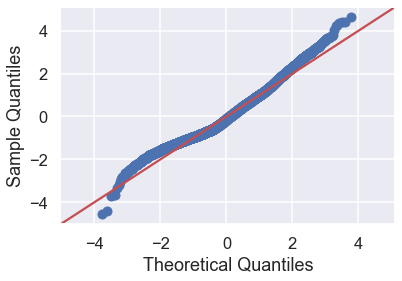

In [27]:
asm.normal(fsm_results)

**Normality Check Results:** The **residuals** are still **not matching the diagonal** and the JB Test **p-value is** still very **small**. Clearly, **the model violates the normality assumption.**

### Checking Homoscadasticity

Build a scatter plot for Errors 

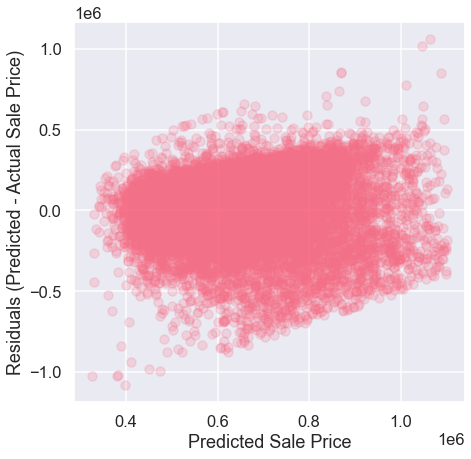

In [28]:
asm.homoscad(fsm_results, fsm_df)

**Homoscadasticity Check Results:** The graph **has improved**, but there is **still an upward trend.**

I will perform **Bruesch-Pagan Test** to get the p-values.

In [29]:
asm.bpag_test( fsm_results, fsm_df, 'SalePrice')

Lagrange Multiplier p-value: nan
F-statistic p-value: 0.0


**Bruesch-Pagan Test Results:** The p-values show that the variance of the **SalePrice is not homogeneous** across all values of the SqFtTotLiving predictor. 


I will try to square root transform the predictor('SqFtTotLiving') and buld the model again.

### Square Root Transform  the 'SqFtTotLiving'

In [30]:
df['SqFtTotLiving'] = np.sqrt(df['SqFtTotLiving'])

In [31]:
df.head()

,SalePrice,PIN,Major,Minor,PropType,HBUAsIfVacant,HBUAsImproved,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,WfntLocation,WfntFootage,LotDepthFactor,NbrBldgSites,CurrentUseDesignation,ExciseTaxNbr,SaleInstrument,SaleReason,BldgGrade,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Obsolescence,PcntNetCondition,Condition,AddnlCost,YearSold
0,847888.0,8078410410,807841,0410,R,1.0,1.0,7424.0,2.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3005895,3,1,8.0,1360.0,0.0,840.0,0.0,0.0,0.0,46.904158,0.0,0.0,0.0,0.0,460.0,0.0,0.0,0.0,5.0,2.0,0.0,4.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1987.0,0.0,0.0,0.0,3.0,0.0,2019
1,819000.0,7550800015,755080,0015,R,1.0,1.0,5000.0,2.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3015395,3,1,7.0,810.0,0.0,0.0,0.0,0.0,0.0,42.426407,990.0,990.0,7.0,0.0,0.0,180.0,0.0,120.0,5.0,2.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1923.0,0.0,0.0,0.0,4.0,0.0,2019
6,612000.0,5137630080,513763,0080,R,1.0,1.0,5239.0,2.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2976399,3,1,8.0,1157.0,0.0,1641.0,0.0,0.0,0.0,52.896125,0.0,0.0,0.0,0.0,490.0,214.0,0.0,0.0,5.0,2.0,0.0,4.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,2018.0,0.0,0.0,0.0,3.0,0.0,2019
14,700000.0,7302000190,730200,0190,R,1.0,1.0,47862.0,2.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2976418,3,1,8.0,1480.0,0.0,0.0,0.0,0.0,0.0,52.630789,1410.0,1290.0,7.0,0.0,500.0,40.0,0.0,500.0,5.0,3.0,0.0,5.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,1978.0,0.0,0.0,0.0,3.0,0.0,2019
21,733000.0,4174600277,417460,0277,R,1.0,1.0,8400.0,2.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2986450,3,1,6.0,1000.0,0.0,0.0,0.0,0.0,0.0,42.426407,1000.0,800.0,6.0,0.0,0.0,160.0,0.0,0.0,5.0,1.0,0.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1949.0,0.0,0.0,0.0,3.0,0.0,2019


# Baseline Model 3

I will build new model after the square root transformation of the predictor.

In [32]:
fsm_df = df[["SalePrice", "SqFtTotLiving"]].copy()
fsm = ols(formula="SalePrice ~SqFtTotLiving" , data=fsm_df)
fsm_results = fsm.fit()
fsm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     4822.
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:40:20   Log-Likelihood:            -1.7767e+05
No. Observations:               12893   AIC:                         3.554e+05
Df Residuals:                   12891   BIC:                         3.554e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.059e+05   1.12e+04     -9.429      0.000   -1.28e+05   -8.39e+04
SqFtTotLiving  1.756e+04    252.900     69.440      0.000    1.71e+04    1.81e+04
==============================================================================
Omnibus:                      688.786   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              803.564
Skew:                           0.593   Prob(JB):                    3.22e-175
Kurtosis:                       3.297   Cond. No.                         242.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Baseline Model 3 Results:

The summary shows that our **R^2 decreased to 0.272**, which means that **only 27% of target variable is explained by predictor**. For each foot **increase in SqFtTotLiving, the Sale Price increases by \$17 560**

## Check Assumptions for Model 3

### Check Linearity

In [33]:
asm.linear(fsm_results)

Rainbow statistic: 0.9702051079805887
Rainbow p-value: 0.8876523813321208


**Linearity Check Results:** The **p-value has increased** slightly, and the **model passes linearity assumption.**

### Check Normality of Residuials

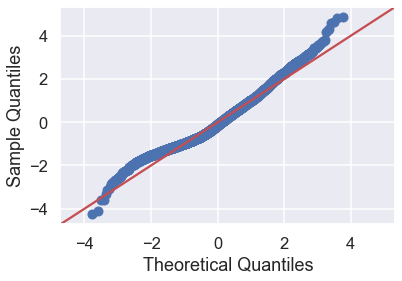

In [34]:
asm.normal(fsm_results)

**Normality Check Results:** The **residuals are not overlaying the predictions** and JB **p-value is** still very **small**, thus  **violating the normality assupmtion.**

### Check Homoscadasticity

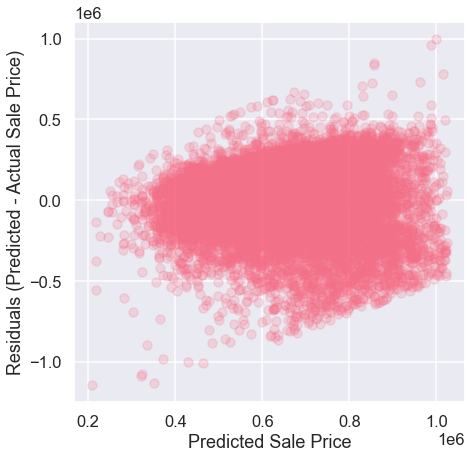

In [35]:
asm.homoscad(fsm_results, fsm_df)

**Bruesch-Pagan Test**

In [36]:
asm.bpag_test( fsm_results, fsm_df, 'SalePrice')

Lagrange Multiplier p-value: nan
F-statistic p-value: 0.0


**Bruesch-Pagan Test Results:** The graph is still **heteroscadastic and has upward trend**. The **p-values** are still 0, as a result, the **homoscadasticity assumption is failed.**

# Baseline Model Results: Best Performed - Model 3

### Model 3 has the most appropriate coeffients and r^2 = 0.272

# Model 4: Add 'SqFt1stFloor' Predictor

I will add SqFt1stFloor feature to the Baseline Model, because it has the next highest correlation coefficient(0.29)

In [37]:
fsm_df = df[["SalePrice", "SqFtTotLiving", "SqFt1stFloor" ]].copy()
fsm = ols(formula="SalePrice ~SqFtTotLiving + SqFt1stFloor" , data=fsm_df)
fsm_results = fsm.fit()
fsm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     2431.
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:40:20   Log-Likelihood:            -1.7766e+05
No. Observations:               12893   AIC:                         3.553e+05
Df Residuals:                   12890   BIC:                         3.553e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9.876e+04   1.13e+04     -8.748      0.000   -1.21e+05   -7.66e+04
SqFtTotLiving  1.844e+04    299.853     61.509      0.000    1.79e+04     1.9e+04
SqFt1stFloor    -36.6764      6.715     -5.462      0.000     -49.839     -23.514
==============================================================================
Omnibus:                      686.452   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              800.353
Skew:                           0.592   Prob(JB):                    1.61e-174
Kurtosis:                       3.294   Cond. No.                     7.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 4 Summary:

The summary shows that **R-Square** has slightly increase to **0.274**, change in SalePrice for each foot SqFtTotLiving, while the SqFt1stFloor is constant is **\$18 350**

And SqFt1stFloor coefficient shows that, while the SqFtTotLiving is unchaged, **the Sale Price for each square feet of SqFt1stFloor increace, decreases by \$25.88**

## Check Assumptions for Model 4

### Linearity Check

In [38]:
asm.linear(fsm_results)

Rainbow statistic: 0.9698788585561943
Rainbow p-value: 0.8901996181951789


**Linearity Check Results:** The **p-value is greater** than 0.05, thus **linearity assupmtion passed.**

### Normality Check of Residuals

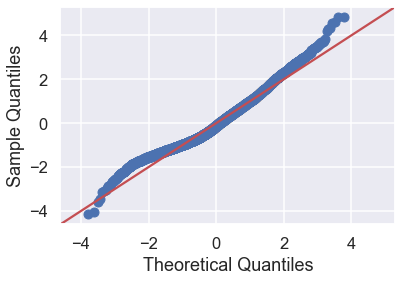

In [39]:
asm.normal(fsm_results)

**Normality Check Results:** The residuals are **not overlapping** the diagonal and thus, **not normally distributed**. The JB **p-value** is still **lower than 0.05.**

### Homoscadasticity Check

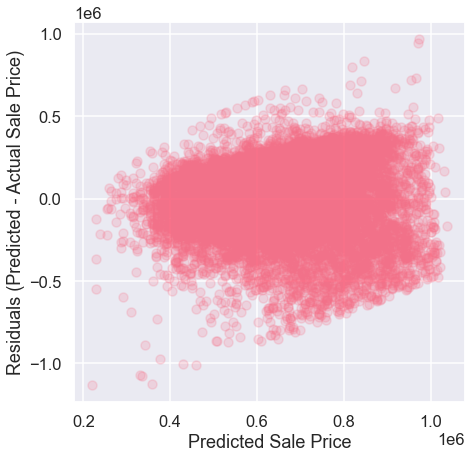

In [40]:
asm.homoscad(fsm_results, fsm_df)

**Bruesch-Pagan Test**

In [41]:
asm.bpag_test(fsm_results, fsm_df, 'SalePrice')

Lagrange Multiplier p-value: 0.0
F-statistic p-value: 0.0


**Homoscadasticity Check Results:** The graph is still **trended upward and heteroscadastic**. BP **p-value is** still **0. Homoscadasticity assumption failed.**

### Independance Check

I will perform **variance inflation factor** measure to check the model for multicoliniarity.

In [42]:
asm.indep(fsm_df)

,VIF,feature
0,17.668363,SqFtTotLiving
1,17.668363,SqFt1stFloor


**Independance Check Results:** The **VIF coefficients** for both predictors are **higher than 5**, thus the **Independance assumption is failed**. 

## Model 4 Results:

* R-Square is still 0.26
* Linearity Assumption passed
* Residuals are not normally distributed
* Predicted Sale Price vs. Residuals Plot is still heteroscdastic
* Model is multicolinear

**I will drop SqFt1stFloor feature from the model, due to model deteriorate.**

# Model 5: Add 'SqFtOpenPorch' Predictor

In [43]:
fsm_df = df[["SalePrice", "SqFtTotLiving", "SqFtOpenPorch"]].copy()
fsm = ols(formula="SalePrice ~SqFtTotLiving + SqFtOpenPorch" , data=fsm_df)
fsm_results = fsm.fit()
fsm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     2423.
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:40:20   Log-Likelihood:            -1.7767e+05
No. Observations:               12893   AIC:                         3.553e+05
Df Residuals:                   12890   BIC:                         3.554e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9.925e+04   1.13e+04     -8.759      0.000   -1.21e+05    -7.7e+04
SqFtTotLiving  1.726e+04    262.788     65.684      0.000    1.67e+04    1.78e+04
SqFtOpenPorch   141.7294     33.953      4.174      0.000      75.177     208.282
==============================================================================
Omnibus:                      678.562   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              789.652
Skew:                           0.589   Prob(JB):                    3.38e-172
Kurtosis:                       3.287   Cond. No.                         461.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 5 Results:

* The R-Squared decreased from to 0.273.
* Every foot increase in SqFtTotLiving, while other predictor remain constans, increases the SalePrice by \$17 260
* For each square feet increase in SqFtOpenPorch, while other predictors remain constans, the SalePrice increases by \$141.73

## Check Assumptions for Model 5

### Linearity Check

In [44]:
asm.linear(fsm_results)

Rainbow statistic: 0.9704219962604347
Rainbow p-value: 0.8859215008262847


**Linearity Check Results:** The **p-value** is still **greater than 0.05**, thus **linearity assumption is passed.**

### Normality Check

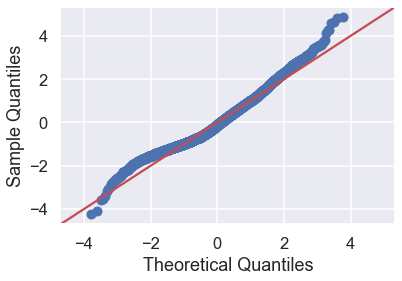

In [45]:
asm.normal(fsm_results)

**Normality Check Results:** The residuals are **not overlapping** the diagonal and thus, **not normally distributed**. The JB **p-value** is still **lower than 0.05.**

### Homoscadasticity Check

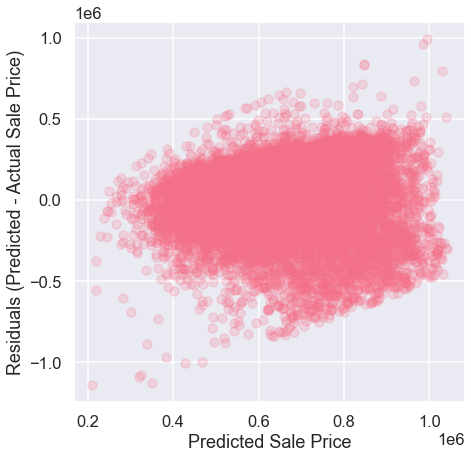

In [46]:
asm.homoscad(fsm_results, fsm_df)

**Bruesch-Pagan Test**

In [47]:
asm.bpag_test(fsm_results, fsm_df, 'SalePrice')

Lagrange Multiplier p-value: 0.0
F-statistic p-value: 0.0


**Homoscadasticity Check Results:** The graph is still **trended upward and heteroscadastic**. BP **p-value is** still **0. Homoscadasticity assumption failed.**

### Independance Check

In [48]:
asm.indep(fsm_df)

,VIF,feature
0,1.62196,SqFtTotLiving
1,1.62196,SqFtOpenPorch


**Independance Check Results:** The **VIF coefficients** for both predictors are **lower than 5**, thus the **Independance assumption is passed**. 

## Model 5 Summary

* R-Square is 0.273
* Linearity Assumption passed
* Residuals are not normally distributed
* Predicted Sale Price vs. Residuals Plot is still heteroscdastic
* Model is not multicolinear

**I will keep SqFtOpenPorch feature in the model, due to model improvement.**

# Model 6: Add 'HeatSystem' Predictor

The HeatSystem predictor is a categorical observatio, thus I will use the the "Data Dictionary" in references folder to look up corresponding lookup type number. Fot the Heat system the LUType number is 108.

In [49]:
lookup = pd.read_csv("../../data/raw/EXTR_LookUp.csv", dtype= str)

ed.show_info(lookup)

Lenght of Dataset: 1208
               missing_values_% Data_type  Duplicates
LUType                      0.0    object           0
LUItem                      0.0    object           0
LUDescription               0.0    object           0


In [50]:
lookup.head()

,LUType,LUItem,LUDescription
0,1,1,LAND ONLY ...
1,1,10,Land with new building ...
2,1,11,"Household, single family units ..."
3,1,12,"Multiple family residence (Residential, 2-4 un..."
4,1,13,"Multiple family residence (Residential, 5+ uni..."


In [51]:
lookup['LUType'] = lookup.LUType.astype(int)
lookup['LUItem'] = lookup.LUItem.astype(int)

In [52]:
asm.mapper_heat(df, 'HeatSystem', 108, lookup)


In [53]:
df.HeatSystem.value_counts()

Forced Air                                            10624
Elec BB                                                 895
Heat Pump                                               677
Floor-Wall                                              361
Hot Water                                               191
Radiant                                                  93
Gravity                                                  30
Other                                                    10
Name: HeatSystem, dtype: int64

In [54]:
ed.show_info(df)

Lenght of Dataset: 12893
                       missing_values_% Data_type  Duplicates
SalePrice                      0.000000   float64           0
PIN                            0.000000    object           0
Major                          0.000000    object           0
Minor                          0.000000    object           0
PropType                       0.000000    object           0
HBUAsIfVacant                  0.000000   float64           0
HBUAsImproved                  0.000000   float64           0
SqFtLot                        0.000000   float64           0
WaterSystem                    0.000000   float64           0
SewerSystem                    0.000000   float64           0
Access                         0.000000   float64           0
Topography                     0.000000   float64           0
StreetSurface                  0.000000   float64           0
RestrictiveSzShape             0.000000   float64           0
WfntLocation                   0.000000   flo

In [55]:
df.fillna('NA', inplace=True)

### One Hot Encode the HeatSystem Feature

In [56]:
ohe = OneHotEncoder(drop='first')
ohe.fit(df[['HeatSystem']])
trans = ohe.transform(df[['HeatSystem']])
heat_table = pd.DataFrame(trans.todense(), columns=ohe.get_feature_names())
heat_table.head()

,x0_Floor-Wall,x0_Forced Air,x0_Gravity,x0_Heat Pump,x0_Hot Water,x0_NA,x0_Other,x0_Radiant
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
heat_table.rename(columns=lambda x: x.strip(), inplace=True)
heat_table.columns = heat_table.columns.str.replace(' ', '')
heat_table.columns = heat_table.columns.str.replace('-', '_')

### Build a Model

In [58]:
df_features = df[["SalePrice", "SqFtTotLiving", "SqFtOpenPorch"]].copy()
fsm_df = pd.concat([df_features, heat_table], axis=1)
fsm_df.head()

,SalePrice,SqFtTotLiving,SqFtOpenPorch,x0_Floor_Wall,x0_ForcedAir,x0_Gravity,x0_HeatPump,x0_HotWater,x0_NA,x0_Other,x0_Radiant
0,847888.0,46.904158,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,819000.0,42.426407,180.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,612000.0,52.896125,214.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,700000.0,52.630789,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,733000.0,42.426407,160.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
formula = asm.formula(fsm_df, 'SalePrice')
fsm = ols(formula= formula , data=fsm_df)
fsm_results = fsm.fit()
fsm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     506.3
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:40:21   Log-Likelihood:            -1.7759e+05
No. Observations:               12893   AIC:                         3.552e+05
Df Residuals:                   12882   BIC:                         3.553e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.312e+05   1.25e+04    -10.507      0.000   -1.56e+05   -1.07e+05
SqFtTotLiving  1.703e+04    277.795     61.311      0.000    1.65e+04    1.76e+04
SqFtOpenPorch   128.7066     33.783      3.810      0.000      62.488     194.925
x0_Floor_Wall  5.109e+04   1.45e+04      3.527      0.000    2.27e+04    7.95e+04
x0_ForcedAir   4.133e+04   8391.024      4.926      0.000    2.49e+04    5.78e+04
x0_Gravity     2.248e+05   4.31e+04      5.215      0.000     1.4e+05    3.09e+05
x0_HeatPump    4.333e+04   1.22e+04      3.544      0.000    1.94e+04    6.73e+04
x0_HotWater    1.693e+05   1.87e+04      9.071      0.000    1.33e+05    2.06e+05
x0_NA          1.143e+05   6.75e+04      1.692      0.091   -1.81e+04    2.47e+05
x0_Other       1.385e+05   7.38e+04      1.876      0.061   -6216.766    2.83e+05
x0_Radiant      2.17e+05   2.54e+04      8.555      0.000    1.67e+05    2.67e+05
==============================================================================
Omnibus:                      655.177   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              758.885
Skew:                           0.576   Prob(JB):                    1.62e-165
Kurtosis:                       3.289   Cond. No.                     3.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 6 Results:

* The R-Squared increased to 0.274.
* Every foot increase in SqFtTotLiving, while other predictors remain constans, increases the SalePrice by \$17 260
* For each square feet increase in SqFtOpenPorch, while other predictors remain constans, the SalePrice increases by \$144.27


## Check Assumptions for Model 6

**Linearity Check**

In [60]:
asm.linear(fsm_results)

Rainbow statistic: 0.9687073891094737
Rainbow p-value: 0.8989712260498077


**Linearity Check Results:** The **p-value** is still **greater than 0.05**, thus **linearity assumption is passed.**

**Normality Check**

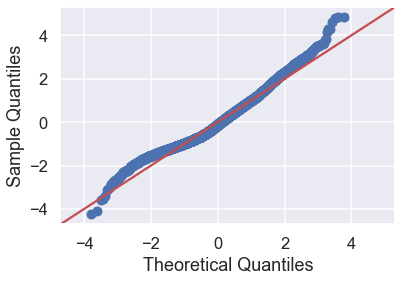

In [61]:
asm.normal(fsm_results)

**Normality Check Results:** The residuals are **not overlapping** the diagonal and thus, **not normally distributed**. The JB **p-value** is still **lower than 0.05.**

**Homoscadasticity Check**

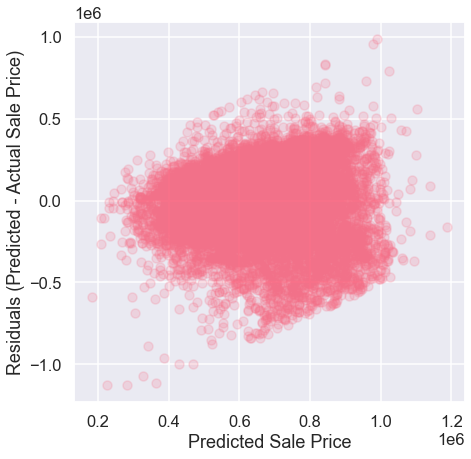

In [62]:
asm.homoscad(fsm_results, fsm_df)

**Bruesch-Pagan Test**

In [66]:
asm.bpag_test(fsm_results, fsm_df, 'SalePrice')

Lagrange Multiplier p-value: 0.0
F-statistic p-value: 0.0


**Homoscadasticity Check Results:** The graph is still **trended upward and heteroscadastic**. BP **p-value is** still **0. Homoscadasticity assumption failed.**

In [68]:
asm.indep(fsm_df)

,VIF,feature
0,14.248817,SqFtTotLiving
1,1.629030,SqFtOpenPorch
2,1.224200,x0_Floor_Wall
3,12.006738,x0_ForcedAir
4,1.022803,x0_Gravity
5,1.802190,x0_HeatPump
6,1.200950,x0_HotWater
7,1.004739,x0_NA
8,1.008328,x0_Other
9,1.088656,x0_Radiant


In [69]:
corr_matrix = fsm_df.corr()
corr_mat = corr_matrix["SalePrice"].sort_values(ascending=False)
print(corr_mat)

SalePrice        1.000000
SqFtTotLiving    0.521753
SqFtOpenPorch    0.173053
x0_ForcedAir     0.090930
x0_HotWater      0.066121
x0_HeatPump      0.058944
x0_Radiant       0.049421
x0_Gravity       0.015369
x0_Other         0.003328
x0_NA           -0.022864
x0_Floor_Wall   -0.094631
Name: SalePrice, dtype: float64


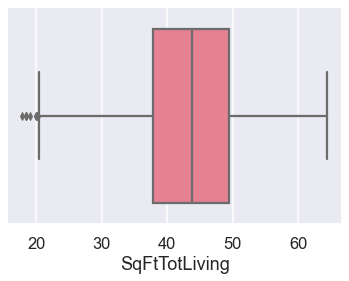

In [73]:
sns.boxplot(x=df['SqFtTotLiving'])

In [65]:
snsh.catplot(x="HeatSystem", y="SalePrice", data=df, kind="box");

NameError: name 'snsh' is not defined

In [ ]:

fsm_df = df[["SalePrice", "SqFtTotLiving", "SqFtOpenPorch", "HeatSystem"]].copy()

In [ ]:
import statsmodels.api as sm


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
      
    return included

In [ ]:
X = df.drop(['SalePrice', 'Minor', 'Major', 'PIN', 'PropType','AddnlCost'], axis=1)
y = df['SalePrice']

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

In [ ]:
import statsmodels.api as sm
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()

In [ ]:
df['SaleInstrument'].value_counts()

In [ ]:
df['SaleReason'].value_counts()